## Stats 211 Problem set 2

Hunter Prout

Assignment 3 - Dr. Eaton's loan data

2/19/24 

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**



1&2. MY Dependent varibales are State grant aid per student and loan repayment. These would be important in the case of studying factors involving student debt. My independent variables are college net price for low income students and levels of research at a university. i hypothesize that there will be an interactive potive correlation bewteen my dependent and independent variables. 

3. As research levels at the univesity increase or as the net price of college increases, my dependent varibles will also icrease. It costs more money to attend high research colleges or high value colleges, causing more loan payments and state grant aid to be administered to cover the cost of expensive institutions.

4. Because I am measuring data across states, there will need to be a control for the differences between states and college net costs in different states. I think that this control variable may cause spurriousness; it is difficult to control for variation of net cost of college across states due to the various different factors involved. 

### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [1]:
cd "/Users/hunter/Desktop/SOC 211 Stats"

/Users/hunter/Desktop/SOC 211 Stats


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "log for problem set 2.log", replace 

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/hunter/Desktop/SOC 211 Stats/log for problem set 2.log
  log type:  text
 opened on:  19 Feb 2024, 20:55:36


In [4]:


insheet using grants2015_college_affordability20200218.csv, clear
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "level of Research at a University"
}

(8 vars, 581 obs)


In [5]:
ds, varwidth(25)

year           stabbr         hgroupstring   igrnt_low_inc  hgrouptemp
instnm         control        highdeg        sgrnt_low_inc  hgroup


In [6]:
codebook


-------------------------------------------------------------------------------
year                                                                (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [2015,2015]                   Units: 1
         Unique values: 1                         Missing .: 0/581

            Tabulation: Freq.  Value
                          581  2015

-------------------------------------------------------------------------------
instnm                                                              (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str64)

         Unique values: 581                       Missing "": 0/581

              Examples: "Florida Atlantic University"
                        "Nicholls State University"
                        "South Carolina State University"


Formulating about State grant aid and the level of research at a uni 
Formulating for loan repayment and college net price for low income students 

In [7]:
label var sgrnt_low "state grant $ per fte" 
codebook sgrnt_low


-------------------------------------------------------------------------------
sgrnt_low_inc                                             state grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [8]:
label var hgroup "level of Research at a University" 
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                        level of Research at a University
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


In [9]:
tab hgroup


   level of |
Research at |
          a |
 University |      Freq.     Percent        Cum.
------------+-----------------------------------
    Highest |         34        5.85        5.85
  Very high |         37        6.37       12.22
       High |         72       12.39       24.61
  Some/None |        438       75.39      100.00
------------+-----------------------------------
      Total |        581      100.00


### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

In [10]:
bysort hgroup: egen mean_StateGrantAidPerStudent=mean(sgrnt_low) 

In [11]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mean_StateGrantAidPerStudent
1,2015,University of California-Berkeley,CA,1,AAU Public,4,22477.96,12904.69,AAU Public,Highest,6340.64
2,2015,University of California-Los Angeles,CA,1,AAU Public,4,17725,12386.26,AAU Public,Highest,6340.64
3,2015,University of Colorado at Boulder,CO,1,AAU Public,4,20471.21,1049.43,AAU Public,Highest,6340.64
4,2015,University of Wisconsin-Madison,WI,1,AAU Public,4,16898.81,2331.341,AAU Public,Highest,6340.64
5,2015,University at Buffalo,NY,1,AAU Public,4,6208.214,4918.043,AAU Public,Highest,6340.64


In [12]:
gen sqdv_StateGrantAidPerStudent=(sgrnt_low-mean_StateGrantAidPerStudent)^2 

In [13]:
*collapse the data set 

collapse ///
(count) n=sgrnt_low ///
(first) mean_StateGrantAidPerStudent ///
(sum) ssqdv_StateGrantAidPerStudent= sqdv_StateGrantAidPerStudent ///
, by(hgroup)

In [14]:
gen sd_StateGrantAidPerStudent=sqrt(ssqdv_StateGrantAidPerStudent/(n-1))

In [15]:
gen se_StateGrantAidPerStudent= sd_StateGrantAidPerStudent/sqrt(n-1)


In [16]:
gen hi_StateGrantAidPerStudent = mean_StateGrantAidPerStudent + 1.96 * se_StateGrantAidPerStudent
gen lo_StateGrantAidPerStudent = mean_StateGrantAidPerStudent - 1.96 * se_StateGrantAidPerStudent

In [17]:
%head

,hgroup,n,mean_StateGrantAidPerStudent,ssqdv_StateGrantAidPerStudent,sd_StateGrantAidPerStudent,se_StateGrantAidPerStudent,hi_StateGrantAidPerStudent,lo_StateGrantAidPerStudent
1,Highest,34,6340.64,1.80e+09,7388.537,1286.179,8861.551,3819.729
2,Very high,37,6196.042,1.58e+09,6616.836,1102.806,8357.542,4034.542
3,High,72,3874.735,1.20e+09,4113.963,488.2376,4831.681,2917.789
4,Some/None,438,3109.573,3.13e+09,2675.931,128.0071,3360.468,2858.679


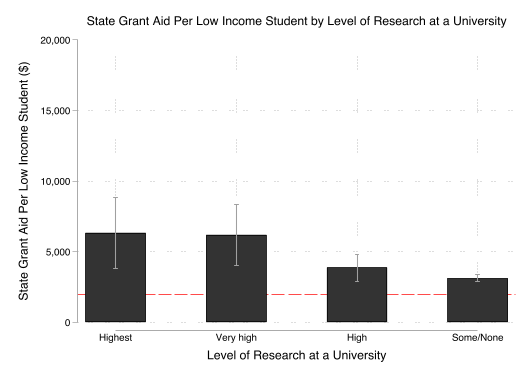

In [18]:
graph twoway (bar mean_StateGrantAidPerStudent hgroup, barw(.5)) ///
(rcap hi_StateGrantAidPerStudent lo_StateGrantAidPerStudent hgroup) , ///
xlabel(1 "Highest" 2 "Very high" 3 "High" 4 "Some/None" , noticks) ///
ytitle("State Grant Aid Per Low Income Student ($)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Level of Research at a University") legend(off) name(igrntbar, replace) ///
title("State Grant Aid Per Low Income Student by Level of Research at a University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

In my graph the confidence intervals do overlap across categories. This means that my relationship between levels of research at a university and State Grant Aid Per Low Income Student are not statistically significant. 

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [19]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?


The coefficent for Net price of college for low-income students is -.0011662. This number means that my relationship will be directionally negative and that it will be small 

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?


The P value is 0.007. This relationship is less than or equal to the significance level of Alpha (.05), thus we reject the null hypothesis that there is no association between x and y. This means that the relationship is significant 

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?


R-squared = 0.2148 - This means that about 21.5 percent of the variation in percent loan repayment is explained by Net price of college for low-income students

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?


 F(1, 31)        =      8.48 
 My F ratio is 8.41. The degrees of freedom have a critical value of 4.16. Because my F ratio is greater than my critical value, I can reject the null hypothesis. 


### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

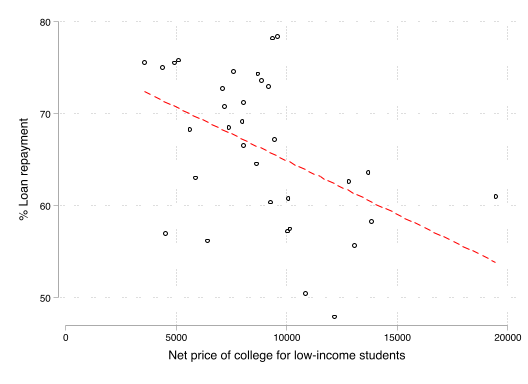

In [20]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Net price of college for low-income students") legend(off) scheme(plotplainblind)

In [21]:
log close


      name:  <unnamed>
       log:  /Users/hunter/Desktop/SOC 211 Stats/log for problem set 2.log
  log type:  text
 closed on:  19 Feb 2024, 20:55:42
-------------------------------------------------------------------------------
